# Problem 1: Data with R

In [2]:
%load_ext rpy2.ipython

In [6]:
%%R

library(tidyverse)

In [312]:
%%R
# make sure to get your data in the same folder, next to the notebook file
# so that this will run!


dat <- read_csv('classification_data.csv')

dat

# A tibble: 1,000 x 2
        X label
    <dbl> <dbl>
 1 2.46       0
 2 1.55       0
 3 5.51       0
 4 0.119      0
 5 7.51       0
 6 0.800      0
 7 1.91       0
 8 1.21       0
 9 2.86       0
10 0.0948     0
# … with 990 more rows


In [311]:
%%R

dat %>%
print(n=100)

# A tibble: 1,000 x 2
           X label
       <dbl> <dbl>
  1  2.46        0
  2  1.55        0
  3  5.51        0
  4  0.119       0
  5  7.51        0
  6  0.800       0
  7  1.91        0
  8  1.21        0
  9  2.86        0
 10  0.0948      0
 11  1.68        0
 12  2.23        0
 13  6.58        0
 14  4.68        0
 15  0.266       0
 16  2.69        0
 17  1.35        0
 18  4.15        0
 19  2.08        0
 20  2.13        0
 21 -0.00345     0
 22  5.06        0
 23  2.46        0
 24  3.57        0
 25  3.50        0
 26  1.57        0
 27  1.46        0
 28  2.73        0
 29  5.22        0
 30  0.0994      0
 31 -0.261       0
 32  3.01        0
 33  2.02        0
 34  6.42        0
 35  2.51        0
 36 -0.381       0
 37  7.39        0
 38  1.23        0
 39  0.962       0
 40  7.15        0
 41  1.06        0
 42  1.02        0
 43  4.11        0
 44  4.46        0
 45  0.678       0
 46  0.415       0
 47  0.0991      0
 48  2.57        0
 49 -0.828       0
 50 -0.14

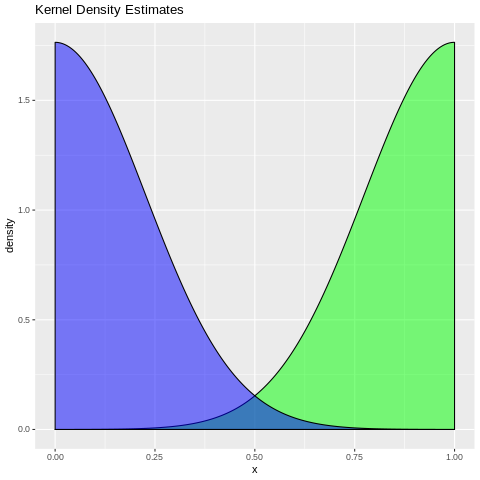

In [310]:
%%R

# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: Don't forget to make sure the labels are factors!
# hint hint: Read the errors carefully! 
# Read the documentation for parse_factor (readr) if confused!


# Factor
dat_factor <- dat %>% 
        mutate(label = as.character(label)) %>%
        mutate(label = parse_factor(label))%>%
        group_by(label)

# Kernel Density Plot
ggplot(dat_factor, aes(fill = x)) + geom_density(aes(x=1), fill="green", alpha = 0.5) + 
  geom_density(aes(x=0), fill="blue", alpha = 0.5) + ggtitle("Kernel Density Estimates")

# Problem 2: Using Classes in Python

In this problem, you will use the classes in the following cell. **You do not need to modify the classes or touch the code in the following cell in any way!**

In [241]:
from abc import ABC, abstractmethod
from math import sqrt

def smart_zip(a,b):
    try:
        return zip(a, b)
    except TypeError:
        return zip([a], [b])

class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        """ Train the model!
        
        X should be a list of data points
        y should be a list of labels
        """
        self.X = X
        self.y = y
        return self

    @abstractmethod
    def _make_prediction(self, labels):
        pass

    def predict(self, new_x):
        """Find the nearest K neighbors
        
        new_x should be a single data point
        """

        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(x,new_x)])))
                 for x in self.X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(labels)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[-self.K:])/self.K
        return round(1 - avg)

In [113]:
from csv import reader

with open('classification_data.csv', 'r') as f:
    dat = list(reader(f))[1:]
    dat = [[float(x), int(label)] for x,label in dat]

## Problem 2.1: Shuffling!

In [307]:
# In your data, "X" is a data point that is nothing more than
# a single number. 
# Shuffle your data into a random order (use random.shuffle!)

import random

print (dat)
X = random.shuffle(dat) 

[[-3.1657161945303858, 1], [-0.9725178197496849, 1], [-9.763935077276724, 1], [3.5730621328724634, 0], [3.6828132395636604, 0], [-1.0439144288878603, 0], [-2.9067087912578096, 1], [1.981048176718918, 0], [-0.8906763142402088, 1], [4.084924891465086, 0], [-0.6987064338631228, 0], [0.6570275755383994, 0], [1.3489559456478246, 0], [4.710233287863777, 0], [-3.813766243974405, 1], [0.7991973025936914, 1], [3.0883806091228125, 0], [-5.534068363918393, 1], [3.9925845262798303, 0], [-6.992951554283538, 1], [0.4488950146741837, 1], [0.29920741011431606, 0], [-0.7382259302817056, 1], [3.5003002586761696, 1], [1.9210996723527836, 1], [0.535204043331087, 1], [3.486019818013162, 1], [4.152972419107066, 0], [-0.11718887667672684, 0], [2.2408444640384557, 0], [-8.32092678014754, 1], [0.5396597754593973, 1], [2.3298419703380877, 0], [1.9248657131609075, 0], [5.359859309844188, 1], [2.5669934923445488, 0], [2.84004920590929, 0], [2.2381880027341023, 1], [-4.429479295241055, 1], [0.7863943711999, 0], [0

In [118]:
# If you shuffled your data, this test should pass
# (i.e. not throw an error)

assert(sum([label for x,label in dat[:50]]) != 0)

## Problem 2.2: Splitting!

In [294]:
# Split your data, which is now a list, into 2 sublists:
# "train" and "test"
# The "train" group should have 700 elements
# The test group should have 300 elements
# Each group should have the same format as the original data


train = dat[:700]
test = dat[700:]

len(train), len(test)

(700, 300)

In [319]:
# Now you will need to make another split, within the groups!
# For each group ("train" and "test") split the X's from the labels.

trainx = [x[0] for x in train]
trainlabel = [x[1] for x in train]

testx = [x[0] for x in test]
testlabels = [x[1] for x in test]


[1.006041848401347,
 1.3669482924503906,
 2.738383515220932,
 7.2782226004466555,
 -1.7228290343073478,
 1.6997774536393027,
 0.4607719018897578,
 2.0977555011411138,
 2.994830906071469,
 5.359859309844188,
 5.499777026369838,
 3.2454061563690977,
 -1.2454112600695728,
 2.7297684826788347,
 -0.584157566979947,
 2.036106217339574,
 -6.653460529736507,
 -2.2469998062891237,
 1.8994124121641933,
 0.963473553070185,
 2.5749997320726417,
 1.2315590617372352,
 2.0831222749006697,
 2.999326731179425,
 -1.1639157002610738,
 -0.44402679662983546,
 -1.1050212074362658,
 -2.730135384654908,
 1.5900807874652934,
 1.569572398107115,
 3.8821597461027153,
 2.9625942401624883,
 4.682826042149369,
 1.345898896023776,
 7.060965960730799,
 -1.1934515476866936,
 -4.429479295241055,
 3.917504456742096,
 4.993798975712915,
 -2.6498703707394133,
 -5.436894499882553,
 2.885569332368835,
 -3.508841055766683,
 5.226022325487157,
 0.9092033809977633,
 0.7482588017509331,
 -2.626742711904975,
 -6.1651680980372925

## Problem 2.3: Testing models!

In [366]:
# For each model: 
# 1. Create an instance the class, with constructor parameters: K=5
# 2. Train the instance on the "train" groups X's and labels (y's)
# 3. Test how well the instance does: 
#    A. Use the trained instance to predict the label of each "X" in the "test" group
#    B. Use your "test" labels to see if the predicted label is equal the true label

#1.
nearest5 = KNearestNeighbors(5)
furthest5 = KFurthestNeighbors(5)

#2. 
nearest5.fit(trainx, trainlabel)
furthest5.fit(trainx, trainlabel)

#3A
nearestlabelprediction = [nearest5.predict(x) for x in testx]
furthestlabelprediction = [furthest5.predict(x) for x in testx]

#3B
nearestlabeltrue = sum([nearestlabelprediction[x] == trainlabel[x] for x in range(0,len(testlabel))])
furthestlabeltrue = sum([furthestlabelprediction[x] == trainlabel[x] for x in range(0,len(testlabel))])

# print(nearestlabeltrue)
# print(furthestlabeltrue)




In [367]:
# Compare the two classes of models!

a = sum(nearestlabelprediction)
b = sum(furthestlabelprediction)
c = sum(testlabel)

a, b, c

(135, 57, 144)